# Feature Engineering
Feature Engineering adalah proses penting dalam machine learning yang bertujuan untuk meningkatkan performa model dengan mengubah, membuat, atau memilih fitur-fitur (kolom data) yang relevan dari dataset. Ini mencakup berbagai teknik seperti:
* Transformasi numerik (log, standardisasi, normalisasi)
* Deteksi dan penanganan outlier
* Encoding data kategorikal
* Ekstraksi fitur baru dari data yang ada

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Load Dataset

In [33]:
dataset = sns.load_dataset("diamonds")

In [3]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Transformasi Logaritmik dan Visualisasi Data
Bagian ini bertujuan untuk memperbaiki distribusi harga yang sangat miring (skewed) dengan menerapkan transformasi logaritmik, kemudian menampilkannya dalam bentuk histogram agar lebih normal dan mudah dianalisis.

<Axes: >

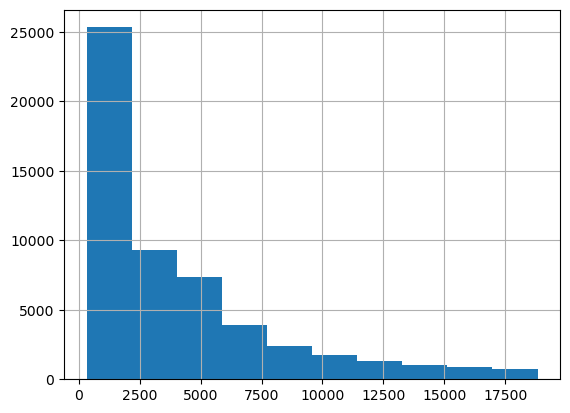

In [7]:
dataset["price"].hist()

## Transformasi Logaritmik
Menunjukkan variasi transformasi logaritmik yang menambahkan 1 untuk menghindari log(0), meskipun dalam kasus harga biasanya tidak diperlukan.

In [34]:
log_price = dataset["price"].apply(np.log)
#log_price = dataset["price"].apply(lambda x: np.log(x) + 1)

<Axes: >

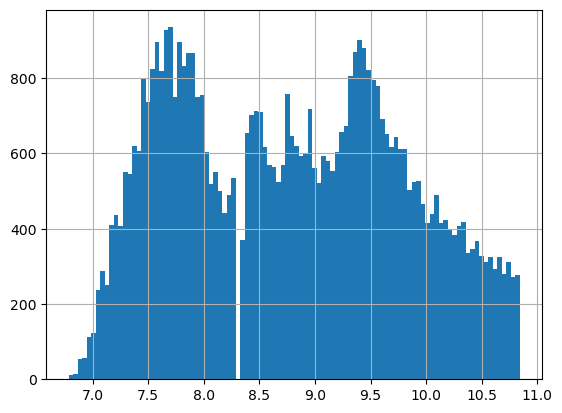

In [35]:
log_price.hist(bins = 100)

## Transformasi Data

In [10]:
dataset["price"].apply(lambda x: np.log(x) + 1)

0        6.786897
1        6.786897
2        6.789960
3        6.811141
4        6.814131
           ...   
53935    8.921898
53936    8.921898
53937    8.921898
53938    8.921898
53939    8.921898
Name: price, Length: 53940, dtype: float64

## Deteksi Outlier Menggunakan IQR
Menambahkan fitur baru untuk menandai data harga yang dianggap outlier berdasarkan metode IQR (interquartile range), yaitu data yang berada di luar batas bawah dan atas.

In [11]:
def outliers(x):

  q1, q3 = x.quantile([0.25, 0.75])
  iqr = q3 - q1

  if (x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
    return False


In [12]:
q1, q3 = dataset["price"].quantile([0.25, 0.75])
iqr = q3 - q1

def outliers(x):
  if (x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
    return False

dataset["price_outliers"] = dataset["price"].apply(outliers)
dataset["price_outliers"]

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: price_outliers, Length: 53940, dtype: bool

In [13]:
dataset[dataset["price_outliers"]]

,carat,cut,color,clarity,depth,table,price,x,y,z,price_outliers
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21,True
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06,True
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74,True
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08,True
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68,True
...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,True
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,True
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,True
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,True


##  Normalisasi Manual dengan Min-Max Scaling

In [15]:
def min_max_scale(x):

  result = (x - x.min()) / (x.max() - x.min())

  return result

In [16]:
dataset[["price", "carat"]].apply(min_max_scale, axis = 0)

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


## Normalisasi Otomatis dengan MinMaxScaler dari Scikit-learn
Menerapkan normalisasi yang sama (Min-Max) seperti sebelumnya, tetapi menggunakan pustaka sklearn agar lebih efisien dan terstandarisasi.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
min_max = MinMaxScaler()
hasil = min_max.fit_transform(dataset[["price", "carat"]])

In [19]:
pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


## Standardisasi Manual (Z-Score)
Melakukan transformasi ke bentuk distribusi normal standar dengan rumus Z-score ((x - mean) / std) secara manual untuk fitur numerik.

In [20]:
def normal_scale(x):

  result = (x - x.mean()) / x.std()

  return result

In [21]:
dataset[["price", "carat"]].apply(normal_scale, axis = 0)

,price,carat
0,-0.904087,-1.198157
1,-0.904087,-1.240350
2,-0.903836,-1.198157
3,-0.902081,-1.071577
4,-0.901831,-1.029384
...,...,...
53935,-0.294728,-0.164426
53936,-0.294728,-0.164426
53937,-0.294728,-0.206619
53938,-0.294728,0.130926


## Standardisasi Otomatis dengan StandardScaler
Melakukan standardisasi seperti sebelumnya namun menggunakan StandardScaler dari Scikit-learn agar lebih praktis dan dapat digunakan langsung dalam pipeline machine learning.

In [22]:
from sklearn.preprocessing import StandardScaler

norm_scaler = StandardScaler()
hasil = norm_scaler.fit_transform(dataset[["price", "carat"]])

In [23]:
pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,-0.904095,-1.198168
1,-0.904095,-1.240361
2,-0.903844,-1.198168
3,-0.902090,-1.071587
4,-0.901839,-1.029394
...,...,...
53935,-0.294731,-0.164427
53936,-0.294731,-0.164427
53937,-0.294731,-0.206621
53938,-0.294731,0.130927


## Encoding Kategorikal dengan .cat.codes
Mengubah kolom kategorikal cut menjadi numerik dengan metode encoding berbasis urutan label (0, 1, 2, ...). Cocok untuk algoritma yang tidak mendukung string.

In [24]:
dataset["cut"] = dataset["cut"].astype("category")
dataset["cut_encode"] = dataset["cut"].cat.codes
dataset[["cut", "cut_encode"]]

,cut,cut_encode
0,Ideal,0
1,Premium,1
2,Good,3
3,Premium,1
4,Good,3
...,...,...
53935,Ideal,0
53936,Good,3
53937,Very Good,2
53938,Premium,1


## Label Encoding dan One-Hot Encoding dengan Scikit-learn
Menunjukkan dua cara encoding: LabelEncoder untuk label numerik tunggal dan get_dummies() untuk representasi biner satu-hot dari kategori (dengan drop first untuk menghindari dummy trap).

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cut_category = le.fit_transform(dataset["cut"])

In [26]:
cut_category

array([2, 3, 1, ..., 4, 3, 2])

In [27]:
le.inverse_transform(cut_category)

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [28]:
pd.get_dummies(dataset["cut"], drop_first = True)

,Premium,Very Good,Good,Fair
0,False,False,False,False
1,True,False,False,False
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
53935,False,False,False,False
53936,False,False,True,False
53937,False,True,False,False
53938,True,False,False,False


## One-Hot Encoding dengan OneHotEncoder Scikit-learn
Melakukan one-hot encoding secara eksplisit menggunakan OneHotEncoder, menghasilkan representasi array biner untuk setiap kategori. Cocok untuk pemrosesan data dalam pipeline Scikit-learn.

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cut_category = ohe.fit_transform(dataset[["cut"]])

In [30]:
pd.DataFrame(cut_category.toarray())

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0


In [31]:
pd.DataFrame(cut_category.toarray())

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0
